In [1]:
import pandas as pd
path = "/content/TeePublic_review.csv"

In [122]:
data = pd.read_csv('TeePublic_review.csv', encoding='ISO-8859-1')
data.head()

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
0,0.0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5
1,1.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5
2,2.0,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5
3,3.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5
4,4.0,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [124]:
data.isnull()

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
278095,False,False,False,False,False,False,False,False,False,False
278096,False,False,False,False,False,False,False,False,False,False
278097,False,False,False,False,False,False,False,False,False,False
278098,False,False,False,False,False,False,False,False,False,False


In [125]:
data.dropna(inplace = True)

In [126]:
data.shape

(247590, 10)

In [ ]:
data.columns

Index(['reviewer_id', 'store_location', 'latitude', 'longitude', 'date',
       'month', 'year', 'title', 'review', 'review-label'],
      dtype='object')

In [ ]:
data.info

NameError: name 'data' is not defined

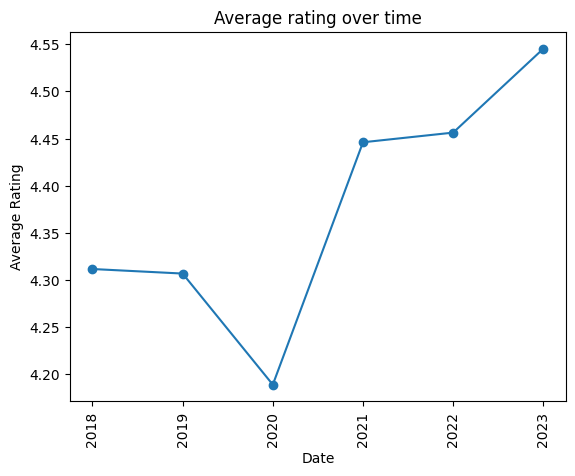

In [ ]:
import matplotlib.pyplot as plt
avg_rating_time = data.groupby('date')['review-label'].mean().reset_index()
plt.plot(avg_rating_time['date'] , avg_rating_time['review-label'] , marker = 'o')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.title('Average rating over time')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
!pip install seaborn

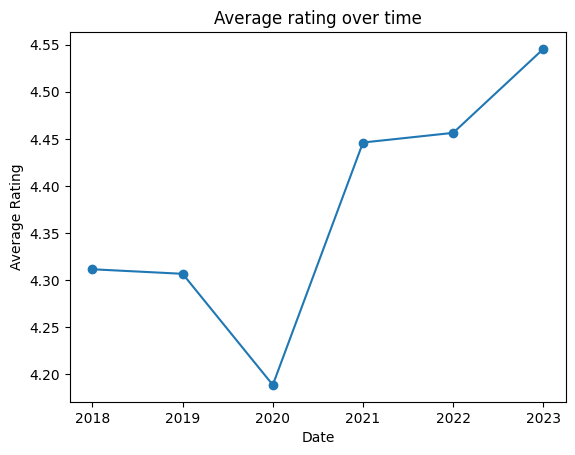

In [ ]:
import seaborn as sns
avg_rating_time = data.groupby('date')['review-label'].mean().reset_index()
plt.plot(avg_rating_time['date'] , avg_rating_time['review-label'] , marker = 'o')
sns.set_theme()
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.title('Average rating over time')
plt.show()

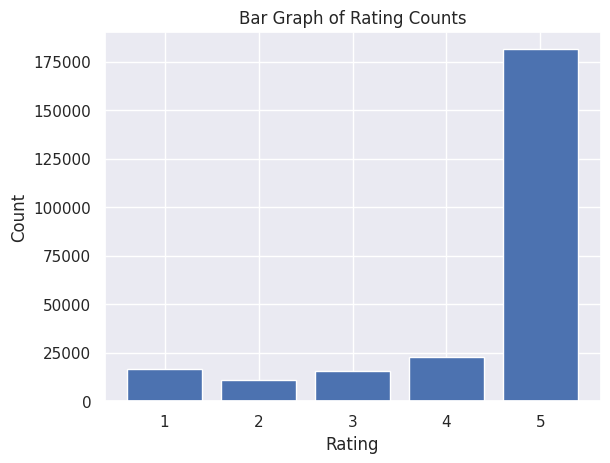

In [ ]:
import matplotlib.pyplot as plt
rating_counts = data['review-label'].value_counts()
plt.bar(rating_counts.index, rating_counts)
plt.title('Bar Graph of Rating Counts')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

<ipython-input-38-5cc4924a3365>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts, palette="viridis")


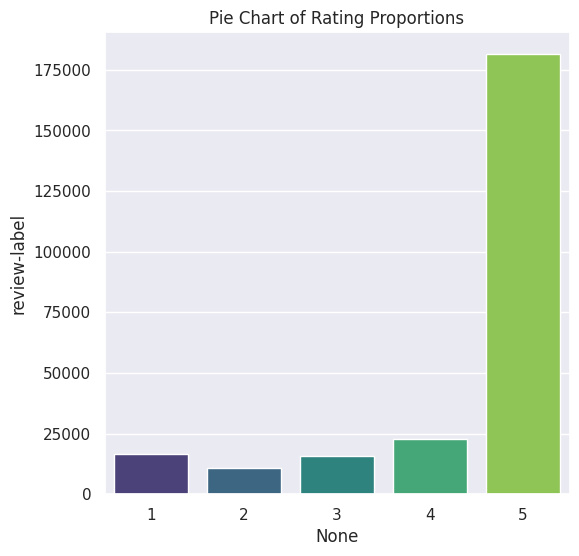

In [ ]:
rating_counts = data['review-label'].value_counts()
plt.figure(figsize=(6, 6))
sns.set_theme()
sns.barplot(x=rating_counts.index, y=rating_counts, palette="viridis")
plt.title('Bar Graph of Rating Proportions')
plt.show()

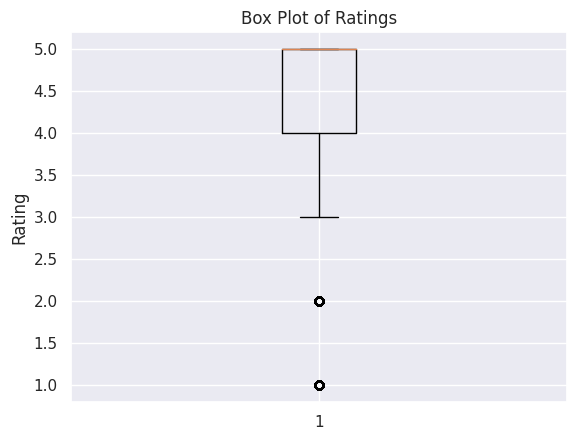

In [ ]:
plt.boxplot(data['review-label'])
plt.title('Box Plot of Ratings')
plt.ylabel('Rating')
plt.show()


<ipython-input-39-4c7a89737f1a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['review-label'] , palette="viridis")


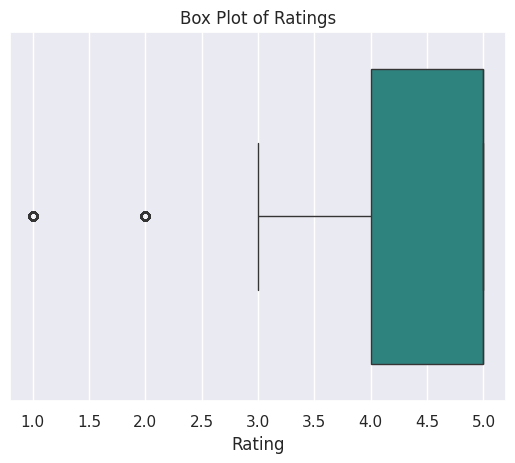

In [ ]:
sns.boxplot(x=data['review-label'] , palette="viridis")
plt.title('Box Plot of Ratings')
plt.xlabel('Rating')
plt.show()

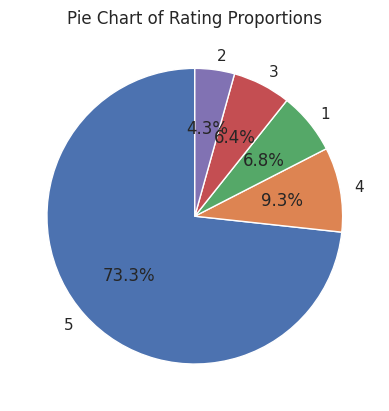

In [ ]:
rating_counts = data['review-label'].value_counts()
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Rating Proportions')
plt.show()

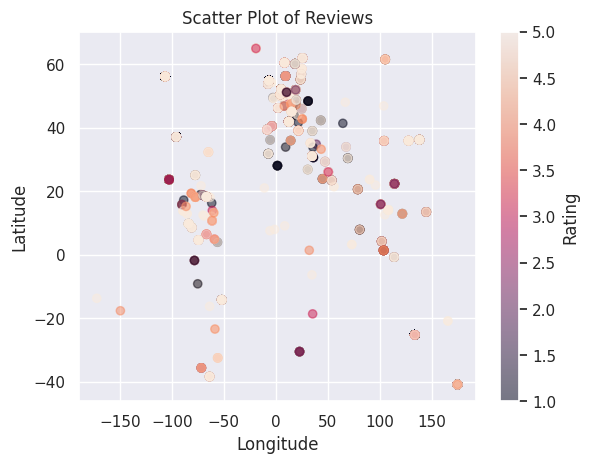

In [ ]:
plt.scatter(data['longitude'], data['latitude'], c=data['review-label'] , alpha=0.5)
plt.title('Scatter Plot of Reviews')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Rating')
plt.show()

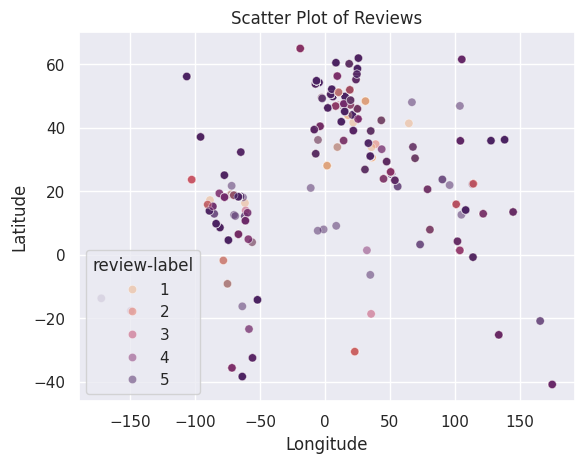

In [ ]:
sns.scatterplot(data=data, x='longitude', y='latitude', hue='review-label', palette='flare', alpha=0.5)
plt.title('Scatter Plot of Reviews')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

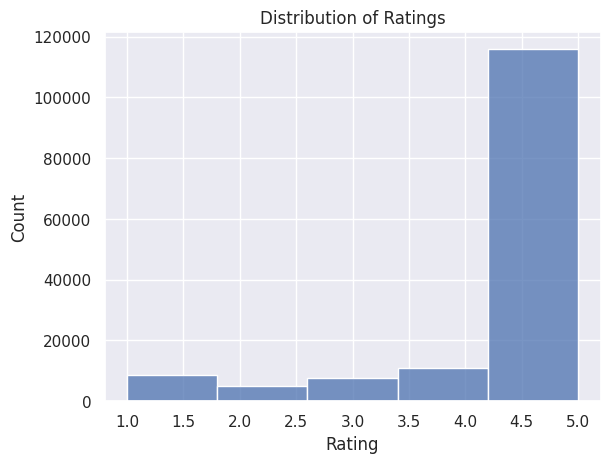

In [ ]:
sns.histplot(data=data, x='review-label', bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

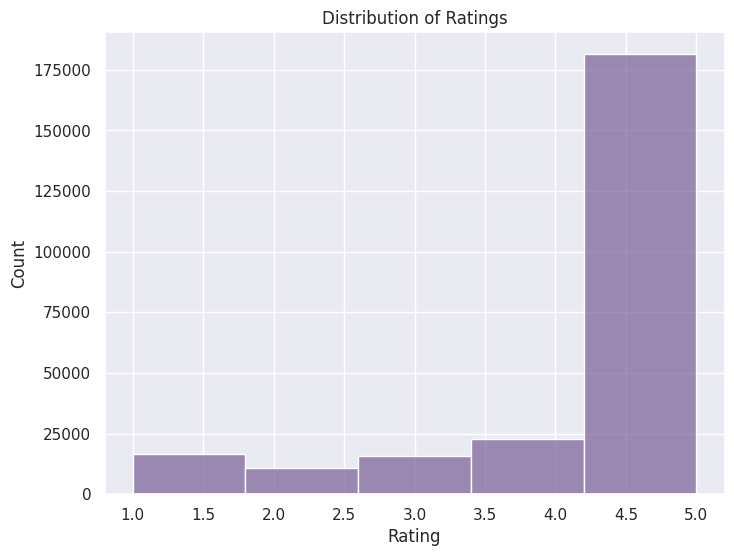

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_theme()
sns.histplot(data=data, x='review-label', bins=5, kde=False, color='#81689D')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

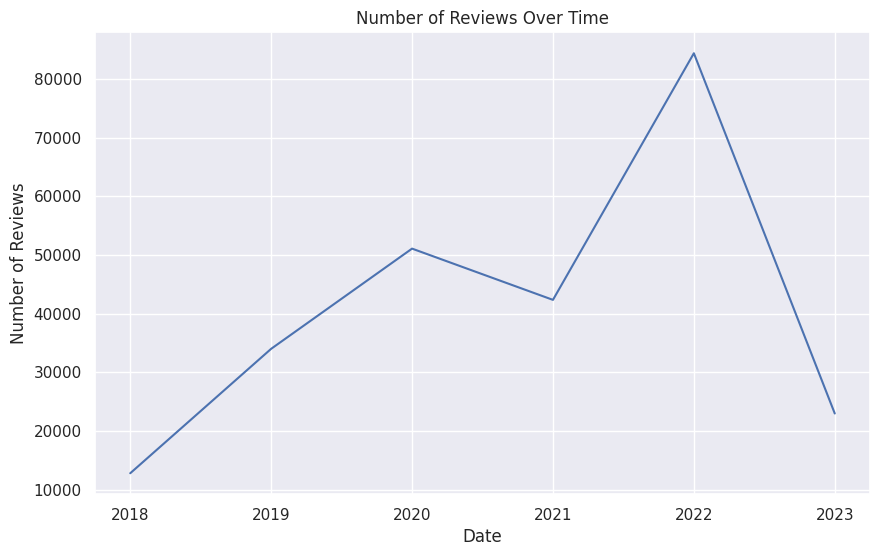

In [ ]:
time_series_df = data.groupby('date').size().reset_index(name='count')

plt.figure(figsize=(10, 6))
plt.plot(time_series_df['date'], time_series_df['count'])
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


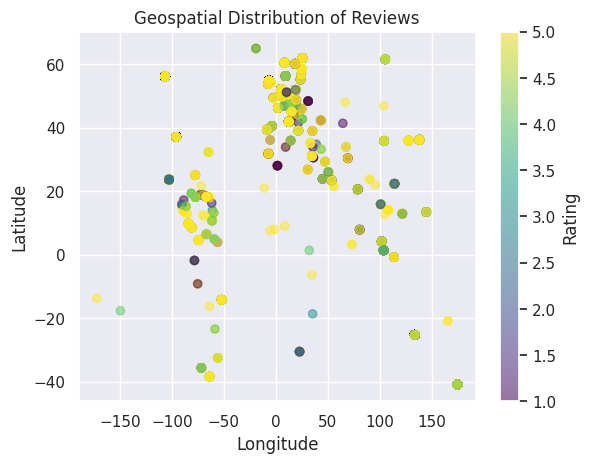

In [ ]:
plt.scatter(data['longitude'], data['latitude'], c = data['review-label'], cmap='viridis', alpha=0.5)
plt.title('Geospatial Distribution of Reviews')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Rating')
plt.show()


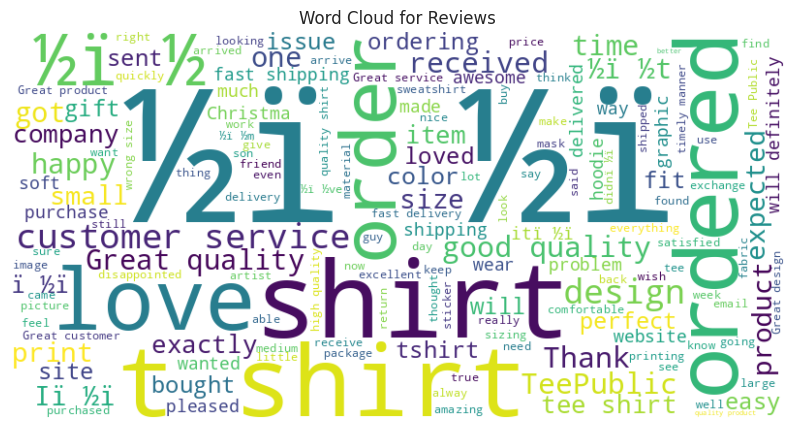

In [ ]:
from wordcloud import WordCloud

# Convert the 'review' column to strings
data['review'] = data['review'].astype(str)

wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(' '.join(data['review']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews')
plt.show()


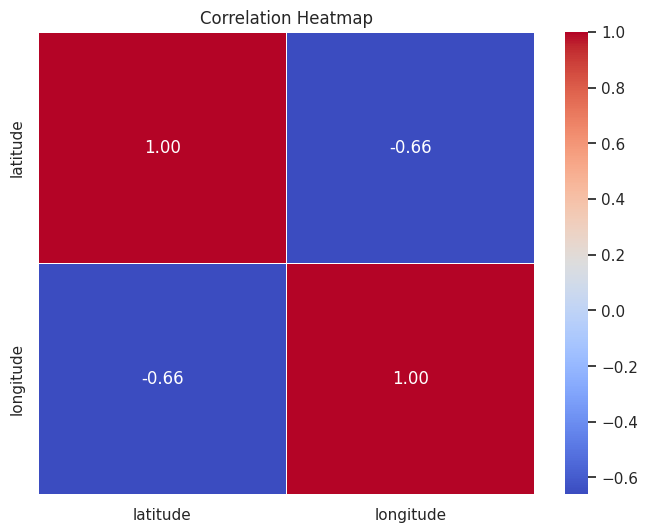

In [ ]:
numerical_columns = ['latitude', 'longitude']
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

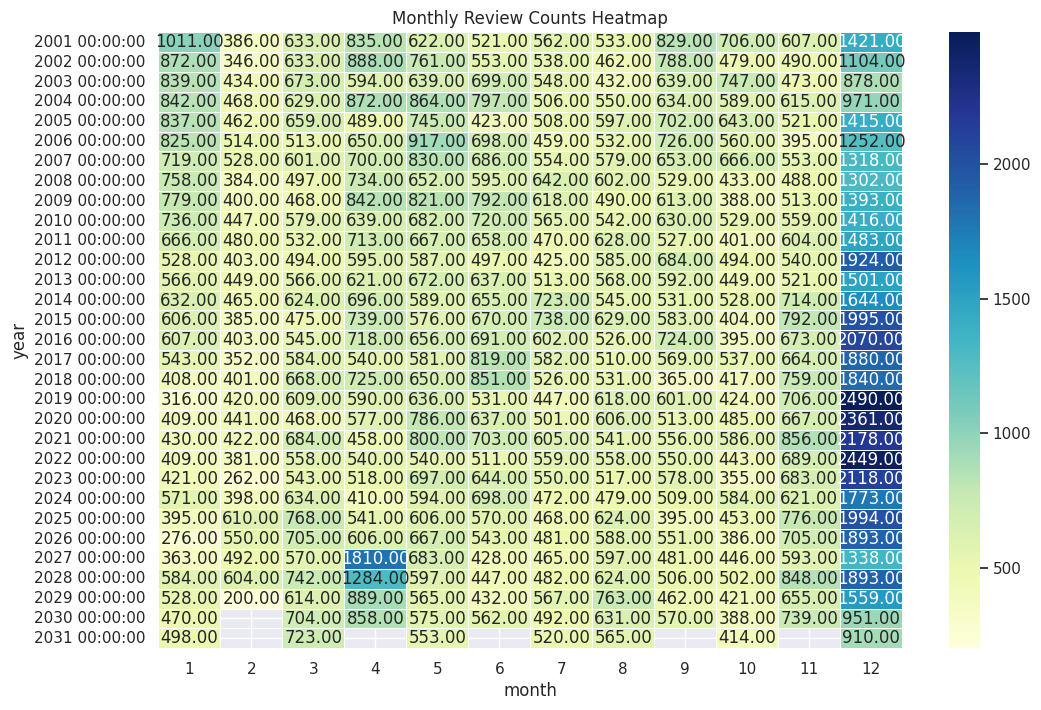

In [ ]:
monthly_review_counts = data.groupby(['year', 'month'])['review'].count().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(monthly_review_counts, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)
plt.title('Monthly Review Counts Heatmap')
plt.show()

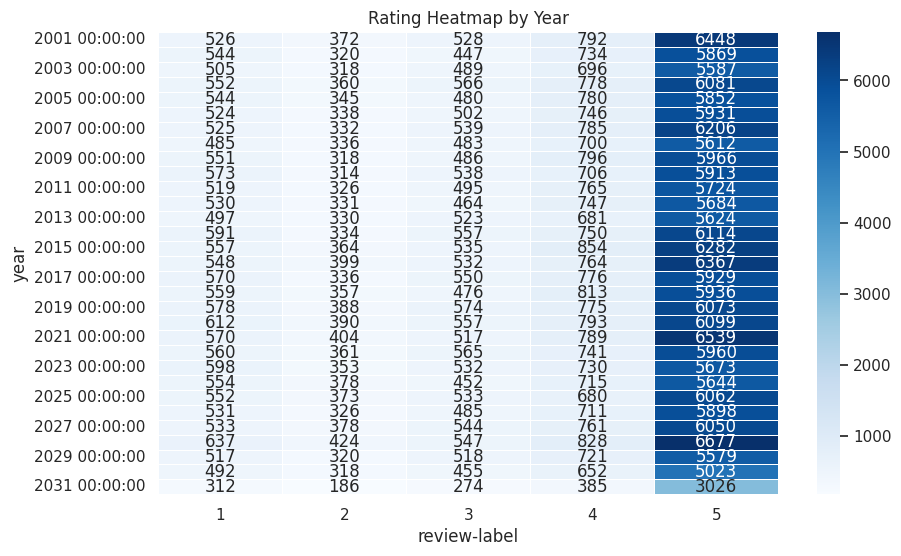

In [ ]:
rating_by_year = data.groupby(['year', 'review-label'])['review-label'].count().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(rating_by_year, cmap='Blues', annot=True, fmt='d', linewidths=.5)
plt.title('Rating Heatmap by Year')
plt.show()

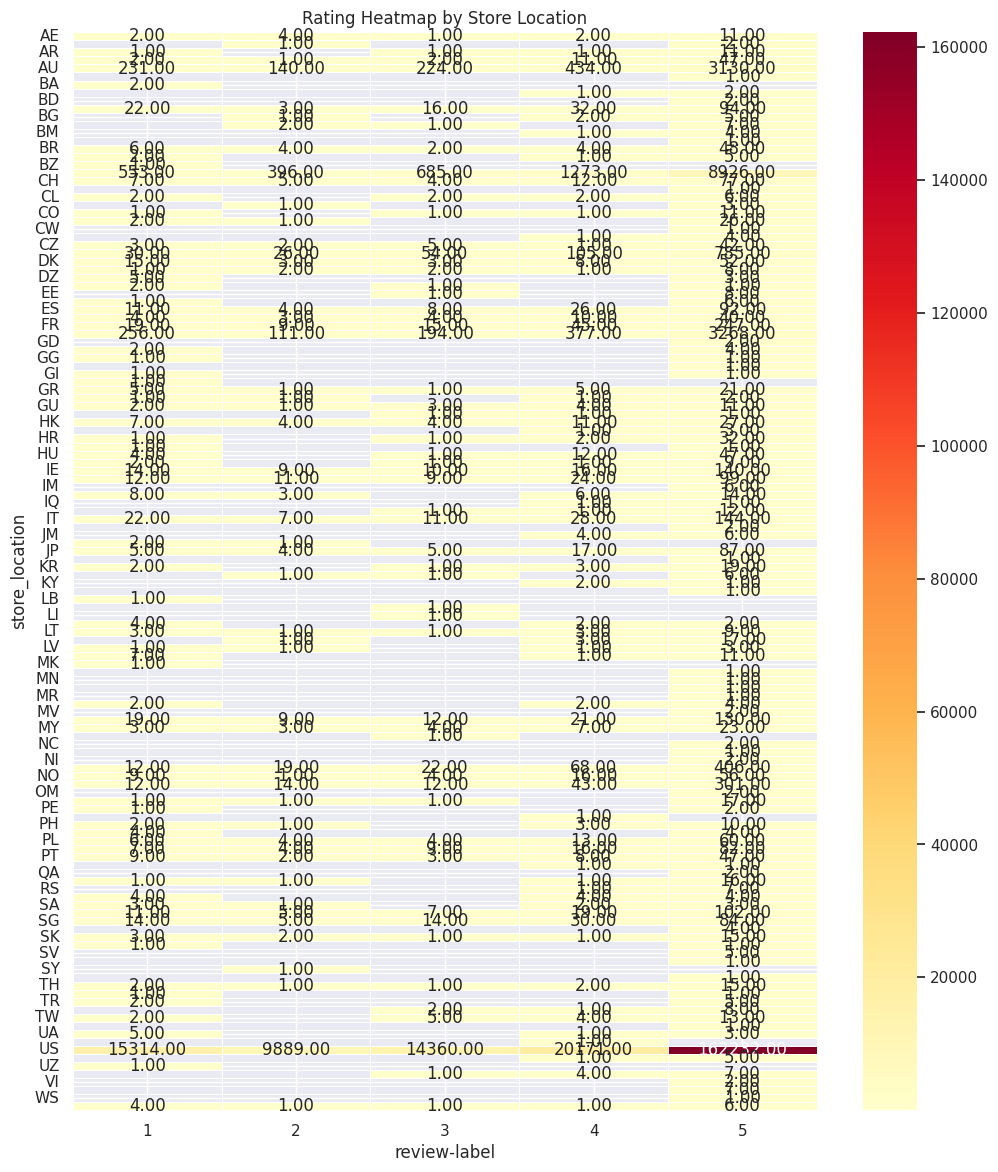

In [ ]:
rating_by_location = data.groupby(['store_location', 'review-label'])['review-label'].count().unstack()

plt.figure(figsize=(12, 14))
sns.heatmap(rating_by_location, cmap='YlOrRd', annot=True, fmt='.2f', linewidths=.5)
plt.title('Rating Heatmap by Store Location')
plt.show()


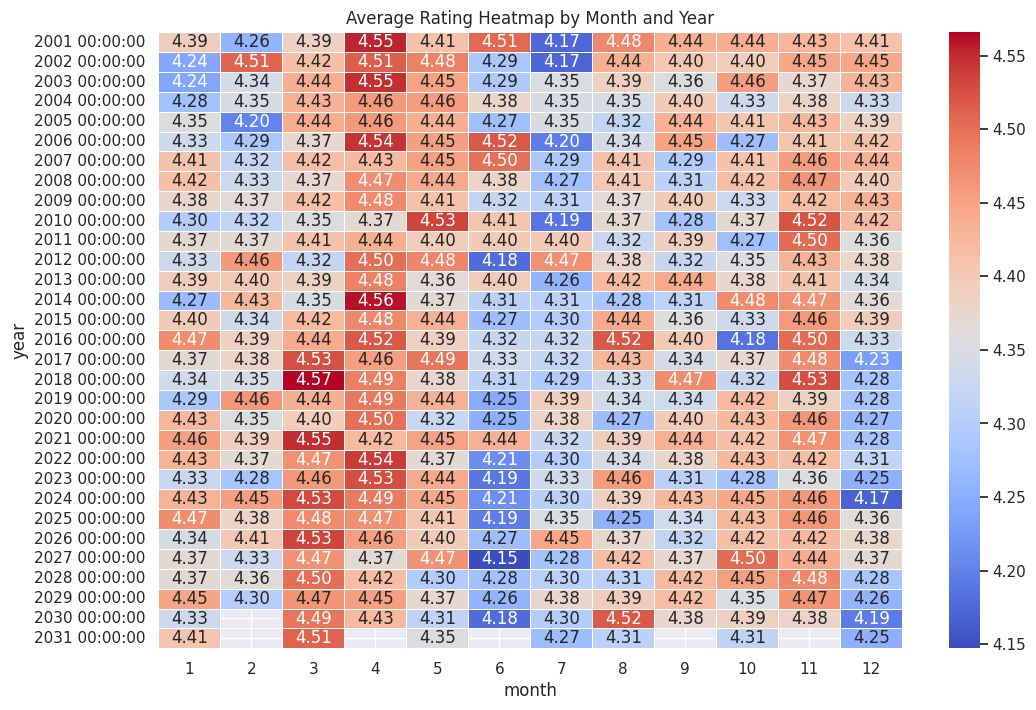

In [ ]:
avg_rating_by_month_year = data.groupby(['year', 'month'])['review-label'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(avg_rating_by_month_year, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Rating Heatmap by Month and Year')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = data[['reviewer_id', 'store_location', 'latitude', 'longitude', 'date','month', 'year', 'title', 'review']]
y = data[['review-label']]

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=.3 , random_state=10)

In [ ]:
import pandas as pd
import numpy as np
path = "/content/TeePublic_review.csv"

In [ ]:
data = pd.read_csv(path, encoding='ISO-8859-1')
data.head()

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
0,0.0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5
1,1.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5
2,2.0,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5
3,3.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5
4,4.0,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4


In [ ]:
data.tail

<bound method NDFrame.tail of         reviewer_id store_location   latitude   longitude  date  month  \
0                 0             US  37.090240  -95.712891  2023      6   
1                 1             US  37.090240  -95.712891  2023      6   
2                 2             US  37.090240  -95.712891  2023      6   
3                 3             US  37.090240  -95.712891  2023      6   
4                 4             CA  56.130366 -106.346771  2023      6   
...             ...            ...        ...         ...   ...    ...   
247609       247609             PR  18.220833  -66.590149  2019      7   
247610       247610             GB  54.787715   -6.492314  2019      7   
247611       247611             ES  40.463667   -3.749220  2019      7   
247612       247612             US  37.090240  -95.712891  2019      7   
247613       247613             US  37.090240  -95.712891  2019      7   

                 year                                          title  \
0       2

In [ ]:
data.shape

(278100, 10)

In [ ]:
data.isnull()

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
278095,False,False,False,False,False,False,False,False,False,False
278096,False,False,False,False,False,False,False,False,False,False
278097,False,False,False,False,False,False,False,False,False,False
278098,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.dropna(inplace = True)

In [ ]:
data.shape

(247590, 10)

In [ ]:
data.info

<bound method DataFrame.info of         reviewer_id store_location   latitude   longitude  date  month  \
0                 0             US  37.090240  -95.712891  2023      6   
1                 1             US  37.090240  -95.712891  2023      6   
2                 2             US  37.090240  -95.712891  2023      6   
3                 3             US  37.090240  -95.712891  2023      6   
4                 4             CA  56.130366 -106.346771  2023      6   
...             ...            ...        ...         ...   ...    ...   
247607       247607             GB  54.787715   -6.492314  2019      7   
247608       247608             US  37.090240  -95.712891  2019      7   
247609       247609             PR  18.220833  -66.590149  2019      7   
247611       247611             ES  40.463667   -3.749220  2019      7   
247612       247612             US  37.090240  -95.712891  2019      7   

                 year                                          title  \
0      

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220612 entries, 0 to 247612
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewer_id     220612 non-null  int64  
 1   store_location  220612 non-null  object 
 2   latitude        220612 non-null  float64
 3   longitude       220612 non-null  float64
 4   date            220612 non-null  int64  
 5   month           220612 non-null  int64  
 6   year            220612 non-null  object 
 7   title           220612 non-null  object 
 8   review          220612 non-null  object 
 9   review-label    220612 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 18.5+ MB


In [ ]:
data.describe()

,reviewer_id,latitude,longitude,date,month,review-label
count,220612.000000,220612.000000,220612.000000,220612.000000,220612.000000,220612.000000
mean,123746.545804,37.305063,-88.885969,2021.179478,7.320277,4.383438
std,71264.747713,9.927765,35.534195,1.165389,3.678143,1.200660
min,0.000000,-40.900557,-172.104629,2019.000000,1.000000,1.000000
25%,61784.750000,37.090240,-95.712891,2020.000000,4.000000,4.000000
50%,124108.500000,37.090240,-95.712891,2021.000000,8.000000,5.000000
75%,185154.250000,37.090240,-95.712891,2022.000000,11.000000,5.000000
max,247612.000000,64.963051,174.885971,2023.000000,12.000000,5.000000


In [ ]:
from sklearn.model_selection import train_test_split

X = data[['reviewer_id', 'store_location', 'latitude', 'longitude', 'date','month', 'year', 'title', 'review']]
y = data[['review-label']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (198072, 9)
X_test shape: (49518, 9)
y_train shape: (198072, 1)
y_test shape: (49518, 1)


In [ ]:
import pandas as pd
import numpy as np
path = "/content/TeePublic_review.csv"

In [ ]:
data = pd.read_csv(path, encoding='ISO-8859-1')

In [ ]:
data.shape

(278100, 10)

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.shape

(247590, 10)

**Logistic Regression**

Accuracy : 0.732

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.sparse import hstack
from sklearn.metrics import accuracy_score

# Assuming 'date' is in datetime format
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Convert 'year' to numeric
data['year'] = pd.to_numeric(data['year'], errors='coerce')

# Initialize label encoder for ordinal variables
label_encoder = LabelEncoder()

# Apply label encoding to ordinal variables
ordinal_columns = ['month', 'day']
data[ordinal_columns] = data[ordinal_columns].apply(label_encoder.fit_transform)

# Initialize one-hot encoder for categorical variables
one_hot_encoder = OneHotEncoder(drop='first', sparse=True)

# Apply one-hot encoding to categorical variables
categorical_columns = ['title']
encoded_categorical = one_hot_encoder.fit_transform(data[categorical_columns].astype(str))

# Features (X) and Target (y)
X_numeric = data[['latitude', 'longitude', 'year', 'month', 'day']]
X = hstack([X_numeric.values, encoded_categorical])
y = data['review-label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Initialize the logistic regression model
model = LogisticRegression(random_state=10)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.732460923300618


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Navie Bayes**

Accuray : 0.7931

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Assuming 'review' is the text data you want to use for classification
X = data['review']
y = data['review-label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Convert the text data to a bag-of-words representation
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Initialize the Multinomial Naive Bayes model
model_nb = MultinomialNB()

# Fit the model on the training data
model_nb.fit(X_train_bow, y_train)

# Make predictions on the testing data
y_pred_nb = model_nb.predict(X_test_bow)

# Evaluate the Multinomial Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f'Multinomial Naive Bayes Accuracy: {accuracy_nb}')


Multinomial Naive Bayes Accuracy: 0.7931391951748186


**SVM**

Accuracy : 0.732

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,  confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming 'review' is the text data you want to use for classification
X = data[['latitude', 'longitude', 'year', 'month', 'day']]
y = data['review-label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM classifier
model_svm = SVC()

# Fit the model on the training data
model_svm.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_svm = model_svm.predict(X_test_scaled)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print(f'SVM Accuracy: {accuracy_svm}')
print('Confusion Matrix:')
print(conf_matrix_svm)


SVM Accuracy: 0.732460923300618
Confusion Matrix:
[[    0     0     0     0  5054]
 [    0     0     0     0  3179]
 [    0     0     0     0  4732]
 [    0     0     0     0  6907]
 [    0     0     0     0 54405]]


**KNN**

Accuracy : 0.696

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming 'review' is the text data you want to use for classification
X = data[['latitude', 'longitude', 'year', 'month', 'day']]
y = data['review-label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier
k_value = 5  # You can choose the value of k based on your requirements
model_knn = KNeighborsClassifier(n_neighbors=k_value)

# Fit the model on the training data
model_knn.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_knn = model_knn.predict(X_test_scaled)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f'KNN Accuracy: {accuracy_knn}')



KNN Accuracy: 0.696824050513618


**Gradient Boosting**

Accuracy : 0.732

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'review' is the text data you want to use for classification
X = data[['latitude', 'longitude', 'year', 'month', 'day']]
y = data['review-label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Initialize the Gradient Boosting classifier
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=10)

# Fit the model on the training data
model_gb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_gb = model_gb.predict(X_test)

# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)

classification_rep_gb = classification_report(y_test, y_pred_gb)

print(f'Gradient Boosting Accuracy: {accuracy_gb}')
print('Classification Report:')
print(classification_rep_gb)


Gradient Boosting Accuracy: 0.7324070708294627
Classification Report:
              precision    recall  f1-score   support

           1       0.18      0.00      0.00      5054
           2       0.00      0.00      0.00      3179
           3       0.00      0.00      0.00      4732
           4       0.00      0.00      0.00      6907
           5       0.73      1.00      0.85     54405

    accuracy                           0.73     74277
   macro avg       0.18      0.20      0.17     74277
weighted avg       0.55      0.73      0.62     74277



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , f1_score , recall_score


conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test , y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Change 'weighted' based on your needs
recall = recall_score(y_test, y_pred, average='weighted')  # Change 'weighted' based on your needs
f1 = f1_score(y_test, y_pred, average='weighted')  # Change 'weighted' based on your needs

print('Confusion Matrix:')
print(conf_matrix)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


Confusion Matrix:
[[    0     0     0     0  5054]
 [    0     0     0     0  3179]
 [    0     0     0     0  4732]
 [    0     0     0     0  6907]
 [    0     0     0     0 54405]]
Accuracy: 0.732460923300618
Precision: 0.5364990041623937
Recall: 0.732460923300618
F1-Score: 0.6193490392155876


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'latitude', 'longitude', 'year', 'month', 'day' are features
# 'review-label' is the target variable for regression
X = data[['latitude', 'longitude', 'year', 'month', 'day']]
y = data['review-label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Initialize the Gradient Boosting Regressor model
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=10)

# Fit the model on the training data
model_gb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_gb = model_gb.predict(X_test)

# Evaluate the Gradient Boosting model for regression
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Mean Squared Error (MSE): {mse_gb}')
print(f'R-squared: {r2_gb}')

Mean Squared Error (MSE): 1.4341144218119153
R-squared: 0.0013737133154617664


**Random Forest**

Accuracy : 0.732

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=10)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')


Random Forest Accuracy: 0.7324205339472515


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Convert labels to start from 0
y_train -= 1
y_test -= 1

# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=10)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb}')


XGBoost Accuracy: 0.7324070708294627


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'reviewer_id', 'store_location', 'latitude', 'longitude', 'date', 'month', 'year' are features
# 'review-label' is the target variable for regression
X = data[['latitude', 'longitude', 'year', 'month', 'day']]
y = data['review-label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Initialize the Linear Regression model
model_lr = LinearRegression()

# Fit the model on the training data
model_lr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lr = model_lr.predict(X_test)

# Evaluate the Linear Regression model
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')


Mean Squared Error (MSE): 1.4355565023406203
R-squared: 0.0003695399373980779


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Initialize the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(learning_rate=0.1, n_estimators=100, random_state=10)

# Fit the model
xgb_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_xgb_regressor = xgb_regressor.predict(X_test)

# Evaluate the XGBoost Regressor model
mse = mean_squared_error(y_test, y_pred_xgb_regressor)
r2 = r2_score(y_test, y_pred_xgb_regressor)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')


Mean Squared Error (MSE): 1.4347530904533188
R-squared: 0.0009289849980511633


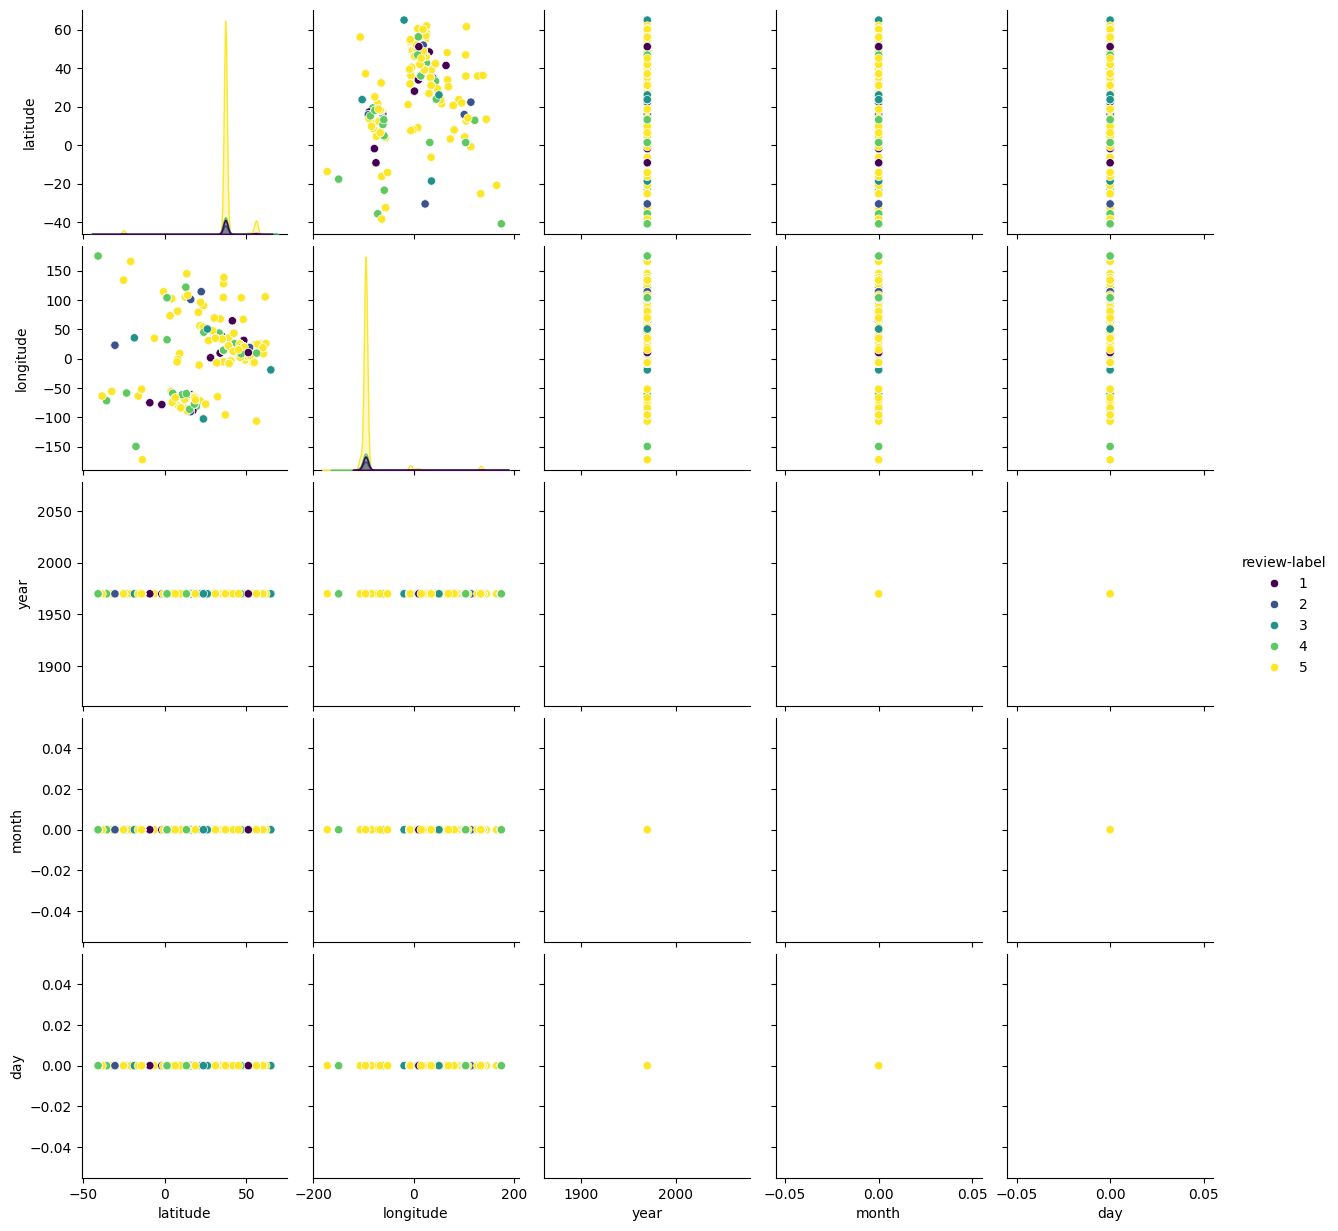

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the variables you want to visualize
# Specify the variables you want to include in the pair plot
vars_to_include = ['latitude', 'longitude', 'year', 'month', 'day', 'review-label']

# Subset the DataFrame with the selected variables
pair_data = data[vars_to_include]

# Create a pair plot
sns.pairplot(pair_data, hue='review-label', palette='viridis')  # 'hue' adds color based on the target variable
plt.show()


<ipython-input-23-14daab8600a1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classifiers, y=accuracies, palette="viridis")


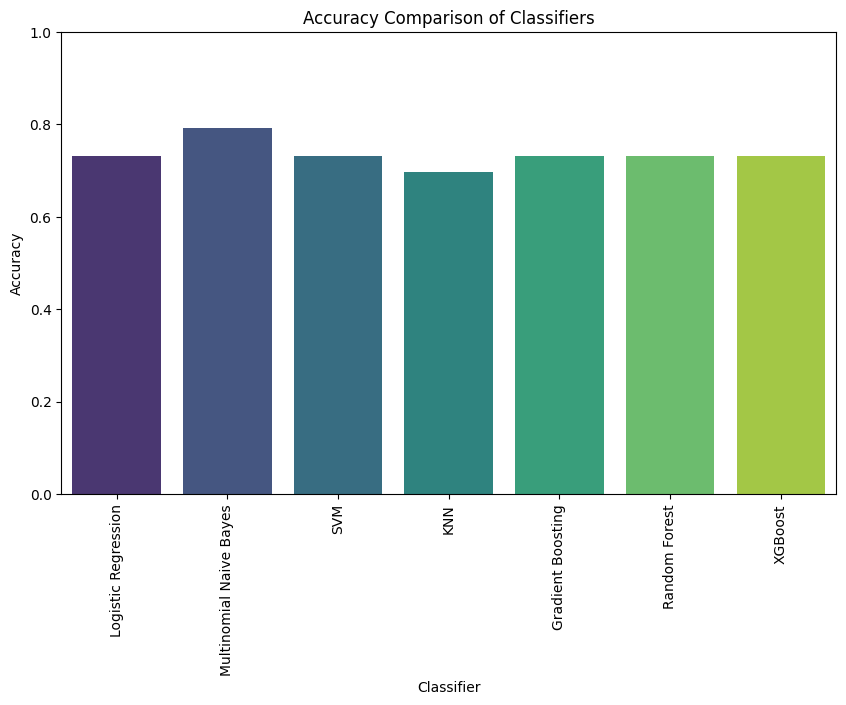

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy values for each classifier
classifiers = ['Logistic Regression', 'Multinomial Naive Bayes', 'SVM', 'KNN', 'Gradient Boosting', 'Random Forest', 'XGBoost']
accuracies = [0.732460923300618, 0.7931391951748186, 0.732460923300618, 0.696824050513618, 0.7324070708294627, 0.7324205339472515, 0.7324070708294627]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=classifiers, y=accuracies, palette="viridis")
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 for accuracy
plt.title('Accuracy Comparison of Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(rotation = 90)
plt.show()


In [128]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 32.9 MB/s eta 0:00:00


In [129]:
import sweetviz as sw

# Analyze the dataset without specifying the target
shopper_sentiment = sw.analyze(data)
shopper_sentiment.show_html('Shopper_Sentiment_Report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report Shopper_Sentiment_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [130]:
from IPython.display import IFrame

# Open the Sweetviz HTML report in the notebook
IFrame(src='Shopper_Sentiment_Report.html', width=1000, height=600)
